Churn Prediction Project
This project predicts customer churn using Telco Customer Churn dataset. 

In [ ]:
pip install kagglehub
import kagglehub

# Download dataset
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Dataset downloaded to:", path)


Defaulting to user installation because normal site-packages is not writeable
Dataset downloaded to: C:\Users\ksuya\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [5]:
import pandas as pd
df = pd.read_csv(f"{path}/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [6]:
# Number of rows and columns
print("Dataset shape (rows, columns):", df.shape)

# Just rows
print("Number of rows:", df.shape[0])

# Just columns
print("Number of columns:", df.shape[1])


Dataset shape (rows, columns): (7043, 21)
Number of rows: 7043
Number of columns: 21


In [7]:
# Check missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Check data types
print("\nData Types:")
print(df.dtypes)

# Convert 'TotalCharges' to numeric (it has some non-numeric values like spaces)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Re-check missing values (some rows will become NaN after conversion)
print("\nMissing Values After Conversion:")
print(df.isnull().sum())

# Drop rows with missing TotalCharges
df = df.dropna(subset=["TotalCharges"])

# Drop customerID (not useful for prediction)
df = df.drop(columns=["customerID"], errors="ignore")

print(f"\nFinal Dataset Shape (after cleaning): {df.shape}")



Missing Values per Column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentM

C:\Users\ksuya\AppData\Local\Temp\ipykernel_26768\3950069.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Churn", palette="coolwarm")


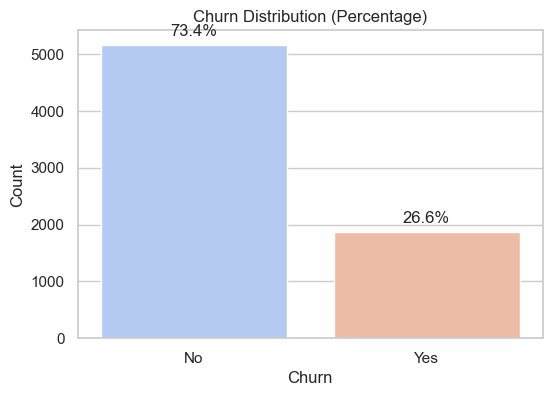

C:\Users\ksuya\AppData\Local\Temp\ipykernel_26768\3950069.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Churn", y="MonthlyCharges", palette="muted", split=True)


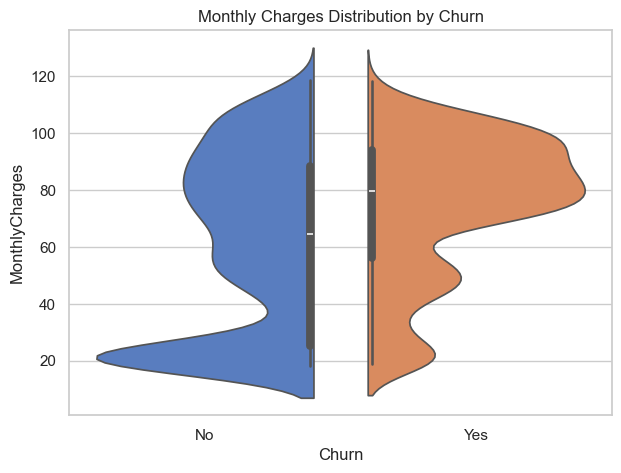

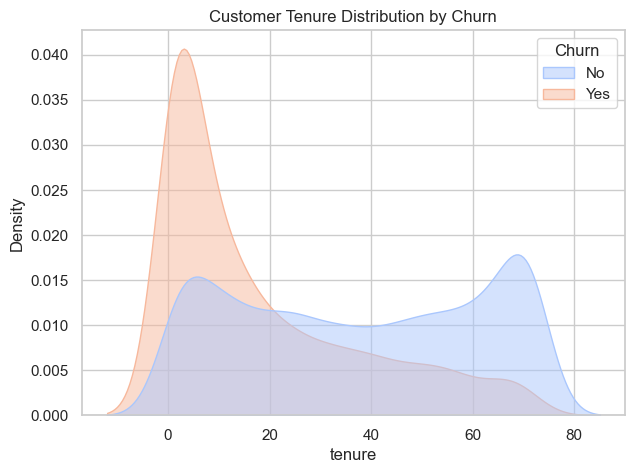

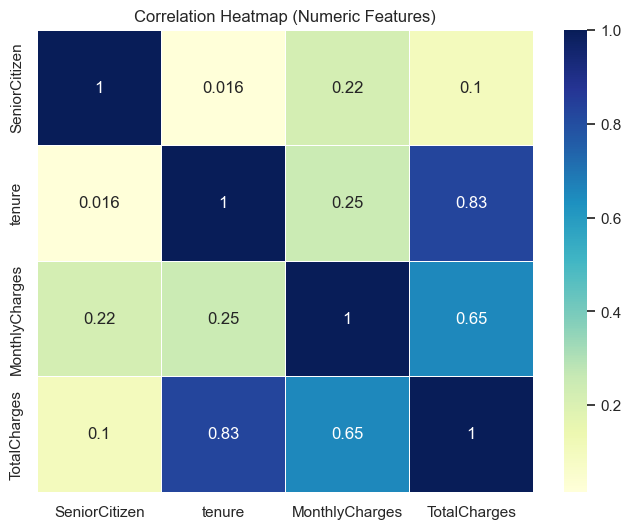

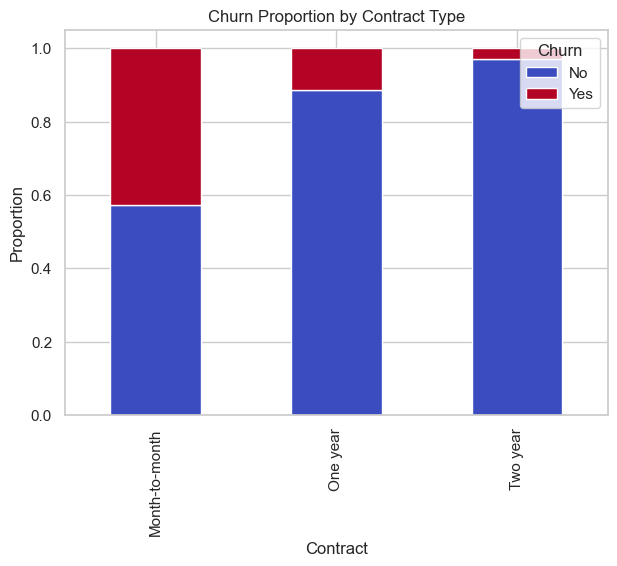

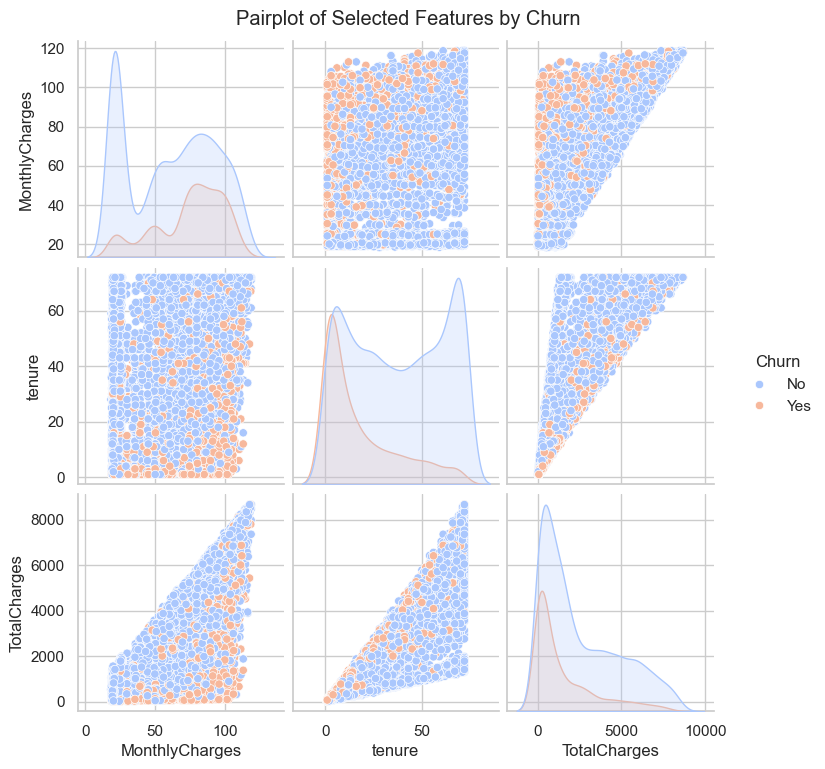

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x="Churn", palette="coolwarm")
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("Churn Distribution (Percentage)")
plt.ylabel("Count")
plt.show()

# Monthly Charges Distribution by Churn (Violin Plot)
plt.figure(figsize=(7,5))
sns.violinplot(data=df, x="Churn", y="MonthlyCharges", palette="muted", split=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

# KDE Plot - Tenure distribution by Churn
plt.figure(figsize=(7,5))
sns.kdeplot(data=df, x="tenure", hue="Churn", fill=True, common_norm=False, palette="coolwarm", alpha=0.5)
plt.title("Customer Tenure Distribution by Churn")
plt.show()

# Correlation Heatmap (Numeric Features Only)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Stacked Bar Chart: Churn by Contract Type
contract_churn = df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack()
contract_churn.plot(kind="bar", stacked=True, figsize=(7,5), colormap="coolwarm")
plt.title("Churn Proportion by Contract Type")
plt.ylabel("Proportion")
plt.legend(title="Churn", loc="upper right")
plt.show()

# Pairplot (Selected Features)
selected_features = ["MonthlyCharges", "tenure", "TotalCharges", "Churn"]
sns.pairplot(df[selected_features], hue="Churn", diag_kind="kde", palette="coolwarm")
plt.suptitle("Pairplot of Selected Features by Churn", y=1.02)
plt.show()



Logistic Regression (Balanced) Accuracy: 0.7257
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407


Random Forest Accuracy: 0.7484
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.52      0.76      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.75      0.76      1407


XGBoost Accuracy: 0.7385
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1033
           1       0.51      0.74      0.60       374

    ac

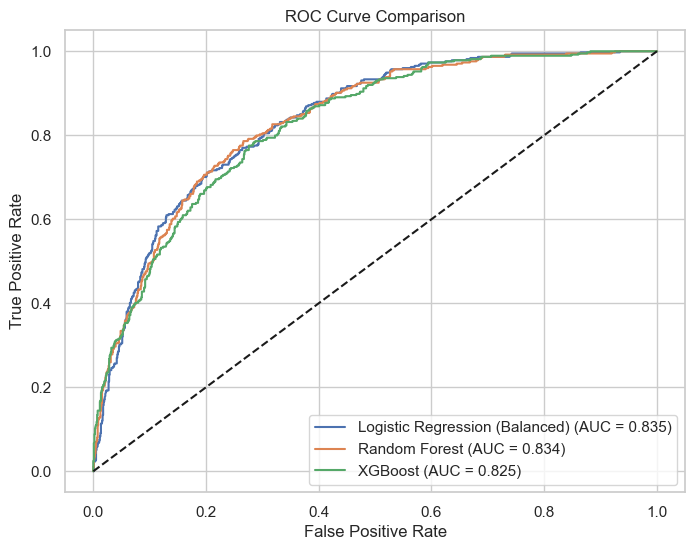

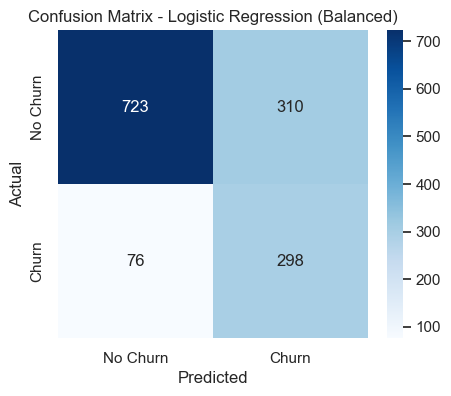

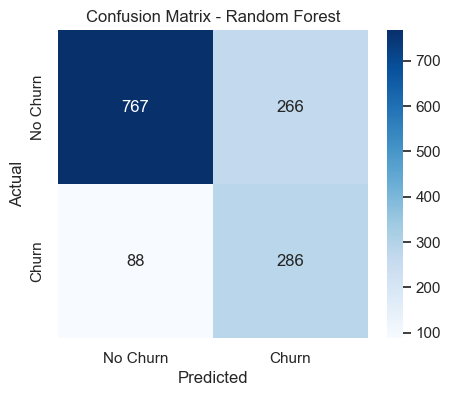

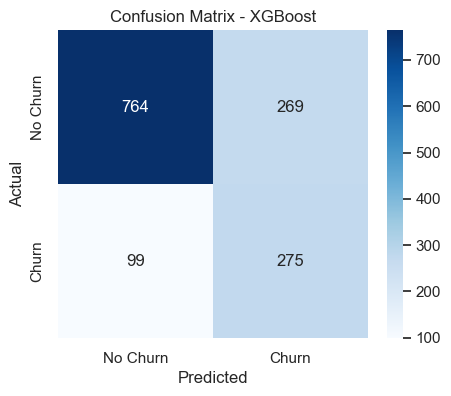

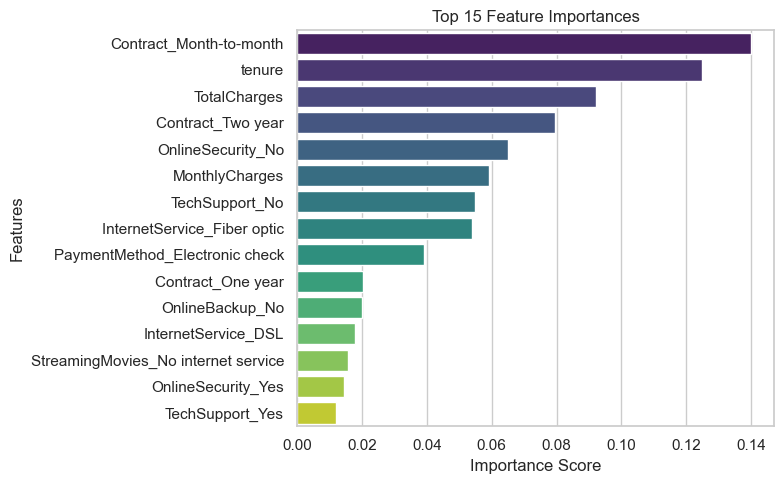

In [40]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_curve, auc
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load Dataset
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# =========================
# DATA PREP
# =========================

# Drop ID & fix types
df.drop("customerID", axis=1, inplace=True)
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)
df["TotalCharges"] = df["TotalCharges"].astype(float)

# Split features & target
X = df.drop("Churn", axis=1)
y = df["Churn"].map({"Yes": 1, "No": 0})  # Convert to binary 1/0

# Identify column types
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing (shared by all models)
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# MODEL DEFINITIONS
# =========================

# Logistic Regression
logreg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced"))
])

# Random Forest
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200, random_state=42, class_weight="balanced", max_depth=8
    ))
])

# XGBoost
xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        scale_pos_weight=(len(y) - sum(y)) / sum(y)
    ))
])

models = {
    "Logistic Regression (Balanced)": logreg_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# =========================
# TRAIN & EVALUATE MODELS
# =========================

results = {}
plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")
    
    results[name] = {"model": model, "accuracy": acc, "auc": roc_auc}

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

# =========================
# CONFUSION MATRICES
# =========================

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["No Churn", "Churn"], 
                yticklabels=["No Churn", "Churn"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# =========================
# FEATURE IMPORTANCE 
# =========================

def plot_feature_importance(model, model_name, top_n=15):
    ohe = model.named_steps["preprocessor"].named_transformers_["cat"].named_steps["encoder"]
    cat_features = ohe.get_feature_names_out(categorical_cols)
    feature_names = np.concatenate([numeric_cols, cat_features])

    if hasattr(model.named_steps["classifier"], "feature_importances_"):
        importances = model.named_steps["classifier"].feature_importances_
        indices = np.argsort(importances)[::-1][:top_n]
        
        plt.figure(figsize=(8, 5))
        sns.barplot(
            x=importances[indices],
            y=feature_names[indices],
            hue=feature_names[indices],  # fixes the FutureWarning
            legend=False,
            palette="viridis"
        )
        plt.title(f"Top {top_n} Feature Importances")
        plt.xlabel("Importance Score")
        plt.ylabel("Features")
        plt.tight_layout()
        plt.show()

plot_feature_importance(results["Random Forest"]["model"], "Random Forest")
